<a href="https://colab.research.google.com/github/shahjamanbadhon/Deep-Learning/blob/main/Implementing_Convolutional_Neural_Network_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

In [112]:
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [113]:
X_train.shape

(50000, 32, 32, 3)

In [114]:
X_test.shape

(10000, 32, 32, 3)

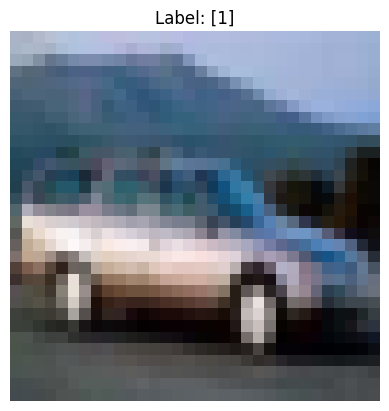

In [115]:
plt.imshow(X_train[4])
plt.title(f"Label: {y_train[4]}")
plt.axis("off")
plt.show()

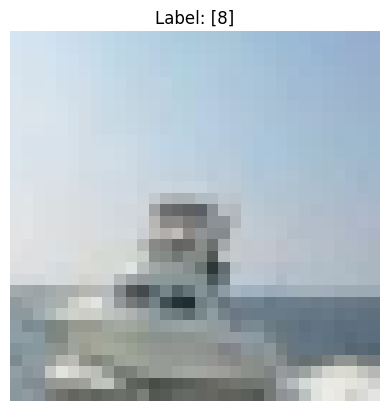

In [116]:
plt.imshow(X_train[100], cmap='gray')
plt.title(f"Label: {y_train[100]}")
plt.axis("off")
plt.show()

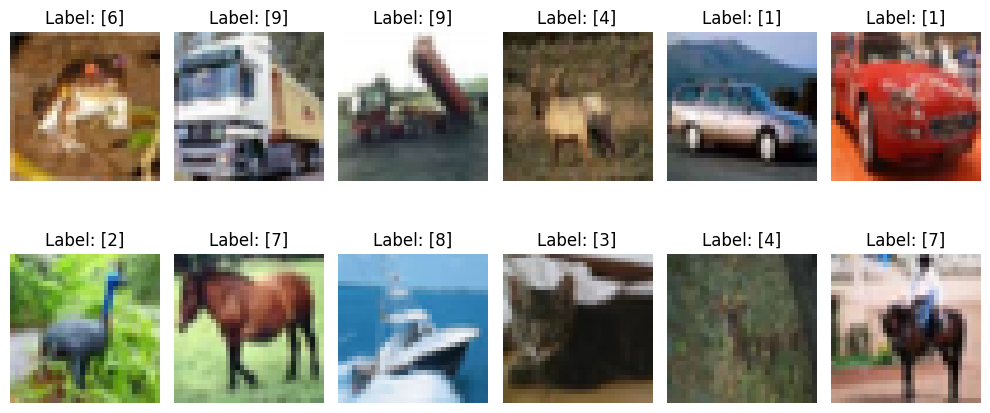

In [117]:
plt.figure(figsize=(10, 5))

for i in range(12):
    plt.subplot(2, 6, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

##Normalize pixel values to the range [0, 1]

In [118]:
X_test, X_test = X_train/255, X_test/255

##Convert labels to one-dimensional arrays

In [119]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [120]:
y_train.shape

(50000, 1)

In [121]:
y_train = y_train.flatten() #2D to 1 D
y_test = y_test.flatten()

In [122]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [123]:
y_train.shape

(50000,)

##Create the model

In [124]:
cnn_model = models.Sequential()

## First Convolutional Block

In [125]:
#karnel 32
#karnel size 3,3
#input_shape(WIDTH,HEIGHT,RGB)
cnn_model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(layers.BatchNormalization()) #convert mean 0 and std 1, reduce overfit
cnn_model.add(layers.MaxPooling2D(2,2)) #downsampling

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##Second Convolutional Block

In [126]:
cnn_model.add(layers.Conv2D(64, (3,3), activation='relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D(2,2))

##Third Convolutional Block

In [127]:
cnn_model.add(layers.Conv2D(64, (3,3), activation='relu'))
cnn_model.add(layers.BatchNormalization())

#Fully Connected Layer

In [128]:
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(128, activation='relu')) #Fully Connnected Layer
cnn_model.add(layers.Dropout(0.5)) #remove 50% connection
cnn_model.add(layers.Dense(10, activation='softmax'))

### Print Model Summary

In [129]:
cnn_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 189,450 (740.04 KB)

 Trainable params: 189,130 (738.79 KB)

 Non-trainable params: 320 (1.25 KB)

##Compile the Model

In [130]:
cnn_model.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

In [131]:
history = cnn_model.fit(X_train, y_train,
                        epochs = 10,
                        batch_size = 64,
                        validation_split = 0.2,
                        verbose = 2)

Epoch 1/10
625/625 - 82s - 131ms/step - accuracy: 0.4232 - loss: 1.6690 - val_accuracy: 0.4780 - val_loss: 1.5016
Epoch 2/10
625/625 - 75s - 119ms/step - accuracy: 0.5752 - loss: 1.2073 - val_accuracy: 0.5496 - val_loss: 1.2673
Epoch 3/10
625/625 - 81s - 130ms/step - accuracy: 0.6349 - loss: 1.0328 - val_accuracy: 0.6459 - val_loss: 0.9919
Epoch 4/10
625/625 - 82s - 131ms/step - accuracy: 0.6750 - loss: 0.9209 - val_accuracy: 0.6413 - val_loss: 1.0283
Epoch 5/10
625/625 - 84s - 134ms/step - accuracy: 0.7045 - loss: 0.8464 - val_accuracy: 0.6382 - val_loss: 1.0583
Epoch 6/10
625/625 - 80s - 128ms/step - accuracy: 0.7261 - loss: 0.7823 - val_accuracy: 0.6835 - val_loss: 0.9003
Epoch 7/10
625/625 - 81s - 130ms/step - accuracy: 0.7460 - loss: 0.7290 - val_accuracy: 0.6736 - val_loss: 0.9531
Epoch 8/10
625/625 - 75s - 120ms/step - accuracy: 0.7609 - loss: 0.6807 - val_accuracy: 0.6835 - val_loss: 0.9675
Epoch 9/10
625/625 - 81s - 129ms/step - accuracy: 0.7771 - loss: 0.6369 - val_accuracy: 

Evaluate on test data

In [132]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}")

313/313 - 5s - 16ms/step - accuracy: 0.1000 - loss: 3.5416
Test Accuracy: 10.00


In [133]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


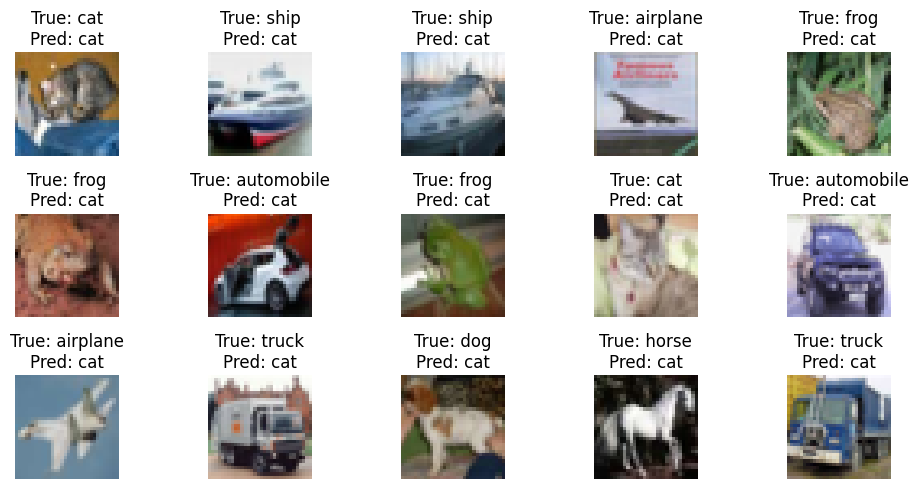

In [134]:
sample_images = X_test[:15]
sample_labels = y_test[:15]
predictions = np.argmax(cnn_model.predict(sample_images), axis=1)

plt.figure(figsize=(10, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {class_names[sample_labels[i]]}\nPred: {class_names[predictions[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Plot accuracy and loss

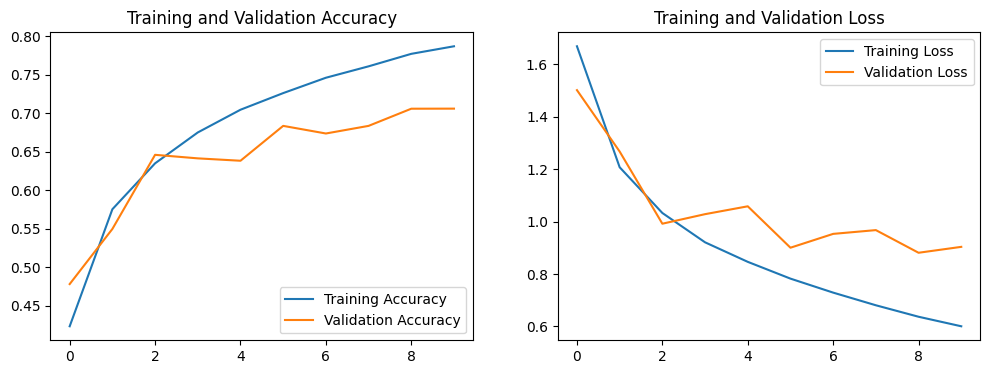

In [135]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


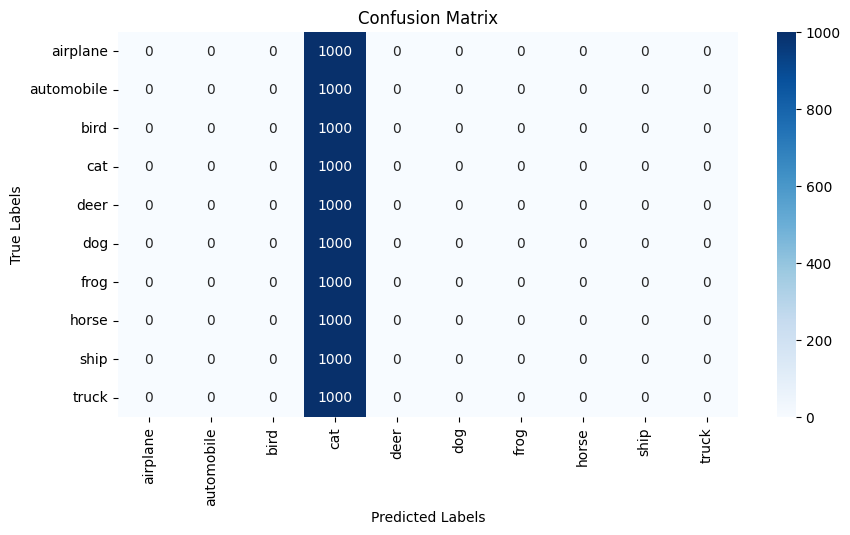

In [136]:
y_pred = np.argmax(cnn_model.predict(X_test), axis=1)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Generate a classification report

In [137]:
report = classification_report(y_test, y_pred, target_names=class_names)
print(report)

              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00      1000
  automobile       0.00      0.00      0.00      1000
        bird       0.00      0.00      0.00      1000
         cat       0.10      1.00      0.18      1000
        deer       0.00      0.00      0.00      1000
         dog       0.00      0.00      0.00      1000
        frog       0.00      0.00      0.00      1000
       horse       0.00      0.00      0.00      1000
        ship       0.00      0.00      0.00      1000
       truck       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Save the Model

In [138]:
cnn_model.save('cnn_cifar10_model.h5')
print("Model saved as 'cnn_cifar10_model.h5'")

Model saved as 'cnn_cifar10_model.h5'


## Load and Use the Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


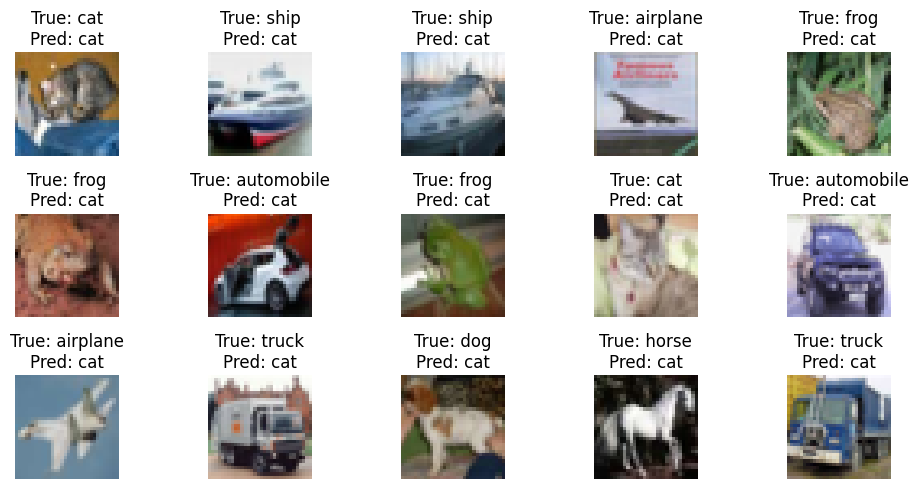

In [139]:
loaded_model = tf.keras.models.load_model('cnn_cifar10_model.h5')

sample_images = X_test[:15]
sample_labels = y_test[:15]
predictions = np.argmax(loaded_model.predict(sample_images), axis=1)

plt.figure(figsize=(10, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {class_names[sample_labels[i]]}\nPred: {class_names[predictions[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()